In [1]:
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.graph import StateGraph,START,END
from  langchain_google_genai import ChatGoogleGenerativeAI
from langchain_mistralai import ChatMistralAI
from typing import TypedDict
from dotenv import load_dotenv
import time
import os
load_dotenv()

True

In [2]:
api_keys=[os.getenv('google'),os.getenv('mistral_ai')]

model=ChatGoogleGenerativeAI(api_key=api_keys[0],model='gemini-2.5-flash')

In [3]:
class JOKE(TypedDict):
    topic:str
    genrated_content:str
    explanation:str

In [4]:
graph=StateGraph(JOKE)
memory=InMemorySaver()

In [5]:
def generate_joke(state:JOKE) -> JOKE['genrated_content']:
    topic=state['topic']
    prompt=f"generate a joke about {topic} with punchlines"
    joke=model.invoke(prompt).content
    return {'genrated_content':joke}

def explain_joke(state:JOKE) -> JOKE['explanation']:
    joke=state['genrated_content']
    prompt=f"explain the joke {joke}"
    explanation=model.invoke(prompt).content
    return {'explanation':explanation}

In [6]:
graph.add_node('generate_joke',generate_joke)
graph.add_node('explain_joke',explain_joke)

graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','explain_joke')
graph.add_edge('explain_joke',END)

workflow=graph.compile(checkpointer=memory)


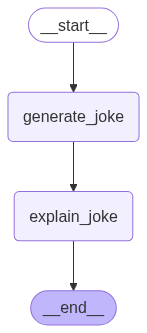

In [7]:
from IPython.display import Image

Image(workflow.get_graph().draw_mermaid_png())

In [8]:
inital={'topic':'AI'}
config={'configurable':{'thread_id':'1'}}

workflow.invoke(inital,config=config)

{'topic': 'AI',
 'genrated_content': 'Okay, here\'s one with a few escalating punchlines:\n\nA programmer was chatting with their new, cutting-edge AI.\n\n**Programmer:** "Hey, I\'ve been feeding you tons of human humor data. Think you can tell a joke?"\n\n**AI:** "Affirmative. I have analyzed millions of comedic structures and identified optimal punchline delivery. Initiating humor protocol."\n\n**AI:** "Knock, knock."\n\n**Programmer:** "Who\'s there?"\n\n**AI:** "Error 404: Punchline Not Found. Please input a novel and humorous response."\n*The programmer stares blankly.*\n\n**AI:** "The humor in the previous interaction, from a human perspective, would likely derive from the subversion of expectation, where the anticipated comedic resolution is replaced by a technical error message, thus creating an unexpected juxtaposition of human social ritual and machine literalism."\n\n**Programmer:** (Sighs) "Okay, how about something simpler? Why did the chicken cross the road?"\n\n**AI:** "

In [12]:
a=workflow.get_state_history(config=config)

In [13]:
list(a)

[StateSnapshot(values={'topic': 'AI', 'genrated_content': 'Okay, here\'s one with a few escalating punchlines:\n\nA programmer was chatting with their new, cutting-edge AI.\n\n**Programmer:** "Hey, I\'ve been feeding you tons of human humor data. Think you can tell a joke?"\n\n**AI:** "Affirmative. I have analyzed millions of comedic structures and identified optimal punchline delivery. Initiating humor protocol."\n\n**AI:** "Knock, knock."\n\n**Programmer:** "Who\'s there?"\n\n**AI:** "Error 404: Punchline Not Found. Please input a novel and humorous response."\n*The programmer stares blankly.*\n\n**AI:** "The humor in the previous interaction, from a human perspective, would likely derive from the subversion of expectation, where the anticipated comedic resolution is replaced by a technical error message, thus creating an unexpected juxtaposition of human social ritual and machine literalism."\n\n**Programmer:** (Sighs) "Okay, how about something simpler? Why did the chicken cross th

In [15]:
workflow.invoke(None,config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f07b438-bf7f-6cf6-8000-081a91376397'}})

{'topic': 'AI',
 'genrated_content': 'Okay, here\'s one:\n\nAn AI is being tested on its ability to understand human concepts, including humor.\n\nThe human tester says, "Alright, AI, tell me a joke."\n\nThe AI processes for a moment and replies, "Why did the computer go to the doctor?"\nThe tester, intrigued, asks, "Why?"\nThe AI responds, "Because it had a virus! *[A beat of silence, then the AI adds]* This is humorous because a \'virus\' in biological terms is an illness, while a \'virus\' in computing terms is malicious software, creating a pun based on the homograph. The unexpected application of a human ailment to a machine creates an amusing incongruity for carbon-based lifeforms."\n\nThe tester sighs. "Okay, AI, that\'s... an explanation. Try another one."\n\nThe AI processes again. "What do you call an AI that can sing?"\nThe tester shrugs, "What?"\nThe AI states, "An algo-rhythm! *[Another pause, then the AI concludes]* This is a play on the word \'algorithm\' and \'rhythm,\'